In [30]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import os


from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
df = pd.read_csv(os.path.join("Covid_Dataset.csv"))
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [3]:
covid_df=df.drop(['Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering', 'Visited Public Exposed Places', 'Family working in Public Exposed Places', 'Wearing Masks', 'Sanitization from Market'], axis=1)

In [6]:
covid_df

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
5,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,Yes
6,Yes,Yes,Yes,No,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
7,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,Yes,Yes
8,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Yes,No,Yes,No,Yes
9,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,Yes,Yes,No,Yes


In [7]:
covid_df.dtypes

Breathing Problem       object
Fever                   object
Dry Cough               object
Sore throat             object
Running Nose            object
Asthma                  object
Chronic Lung Disease    object
Headache                object
Heart Disease           object
Diabetes                object
Hyper Tension           object
Fatigue                 object
Gastrointestinal        object
COVID-19                object
dtype: object

In [8]:
covid_df.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,2771,2821,2883,4383


<AxesSubplot:xlabel='COVID-19', ylabel='count'>

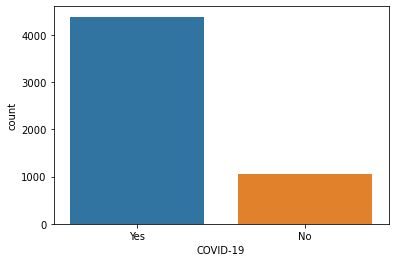

In [10]:
sns.countplot(x='COVID-19',data=covid_df)

Text(0.5, 1.0, 'number of cases')

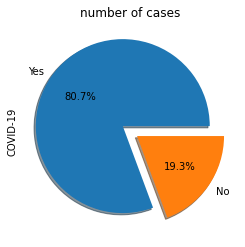

In [11]:
covid_df["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('number of cases')

In [14]:
covid_df.replace(('Yes', 'No'), (1, 0), inplace=True)

array([[<AxesSubplot:title={'center':'Breathing Problem'}>,
        <AxesSubplot:title={'center':'Fever'}>,
        <AxesSubplot:title={'center':'Dry Cough'}>,
        <AxesSubplot:title={'center':'Sore throat'}>],
       [<AxesSubplot:title={'center':'Running Nose'}>,
        <AxesSubplot:title={'center':'Asthma'}>,
        <AxesSubplot:title={'center':'Chronic Lung Disease'}>,
        <AxesSubplot:title={'center':'Headache'}>],
       [<AxesSubplot:title={'center':'Heart Disease'}>,
        <AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Hyper Tension'}>,
        <AxesSubplot:title={'center':'Fatigue '}>],
       [<AxesSubplot:title={'center':'Gastrointestinal '}>,
        <AxesSubplot:title={'center':'COVID-19'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

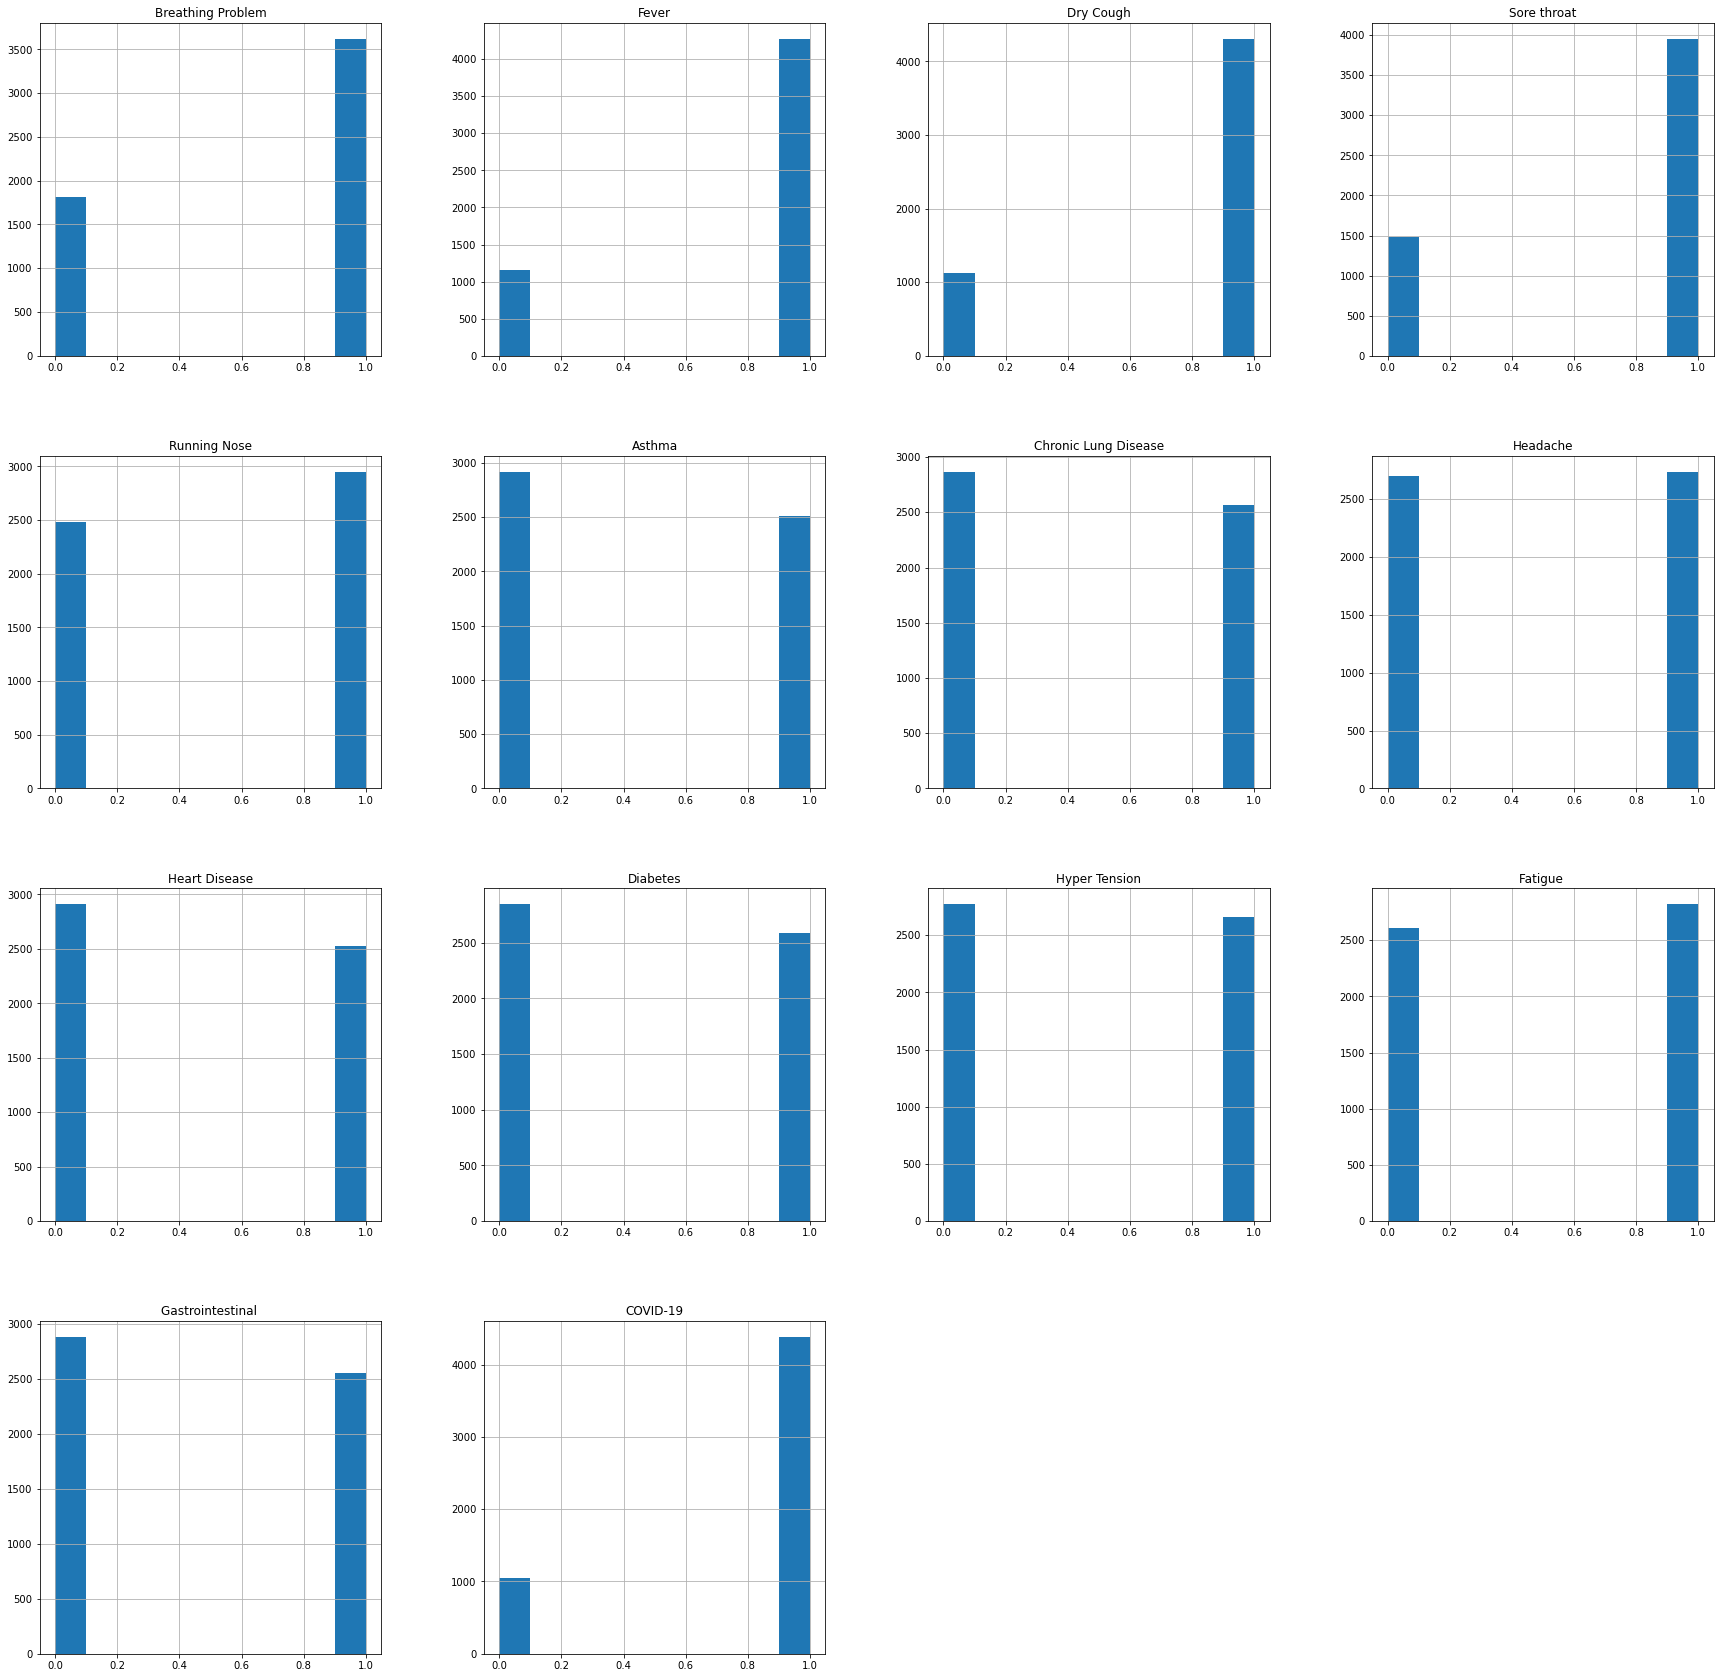

In [15]:
covid_df.hist(figsize=(30,30))

In [16]:
corr=covid_df.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.040627


In [20]:
X=covid_df.drop(["COVID-19"], axis=1)
y=covid_df["COVID-19"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [34]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict (X_test)
accuracy=model.score(X_test, y_test) *100
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 91.02281089036056


In [8]:
# from sklearn.preprocessing import StandardScaler
# scaler= StandardScaler()
# scaled_df=scaler.fit_transform(df)

In [17]:
# scaled_df

In [62]:
#KNeighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_test, y_test)*100
print(f'Model Accuracy: {knn_accuracy}')

Model Accuracy: 93.15673289183223


In [65]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train, y_train)
gaussian_accuracy = model.score(X_test, y_test) *100
print(f'Model Accuracy: {gaussian_accuracy}')


Model Accuracy: 90.13980868285503


In [70]:
#SVM
from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred=svm_model.predict(X_test)
svm_model_accuracy = model.score(X_test, y_test) *100
print(f'Model Accuracy: {svm_model_accuracy}')


Model Accuracy: 90.13980868285503


In [75]:
model_scores = {'Models': ['Logistic Regression', 'KNeighbors Classifier', 'Gaussian Naive Bayes', ' SVM'], 
                'Scores': [accuracy, knn_accuracy, gaussian_accuracy, svm_model_accuracy]} 

In [80]:
scores_df=pd.DataFrame(model_scores)
scores_df.sort_values(by=['Scores'], ascending=False,inplace=True)
  
scores_df

,Models,Scores
1,KNeighbors Classifier,93.156733
0,Logistic Regression,91.022811
2,Gaussian Naive Bayes,90.139809
3,SVM,90.139809
